In [248]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [249]:
df = pd.read_csv('C:/Users/sramisetty/Documents/GitHub/Predicting-Cervical-Cancer/Capstone2/kag_risk_factors_cervical_cancer.csv')

In [250]:
df_nan = df.replace("?", np.nan)
df1 = df_nan.convert_objects(convert_numeric=True)
df1.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [251]:
df1['First sexual intercourse'].fillna(df1['First sexual intercourse'].median(), inplace = True)
df1['Num of pregnancies'].fillna(df1['Num of pregnancies'].median(), inplace = True)
df1['First sexual intercourse'].fillna(df1['First sexual intercourse'].median(), inplace = True)
df1['Smokes'].fillna(0,inplace = True)
df1['Number of sexual partners'].fillna(df1['Number of sexual partners'].median(), inplace = True)

l = (df1['Smokes']==1)
df1.loc[l,'Smokes (years)'] = df1.loc[l,'Smokes (years)'].fillna(df1.loc[l,'Smokes (years)'].median())
l = (df1['Smokes']==0)
df1.loc[l,'Smokes (years)'] = df1.loc[l,'Smokes (years)'].fillna(0)
l = (df1['Smokes']==1)
df1.loc[l,'Smokes (packs/year)'] = df1.loc[l,'Smokes (packs/year)'].fillna(df1.loc[l,'Smokes (packs/year)'].median())
l = (df1['Smokes']==0)
df1.loc[l,'Smokes (packs/year)'] = df1.loc[l,'Smokes (packs/year)'].fillna(0)

df2 = df1.drop(['Hinselmann','Schiller','Citology','Biopsy'], axis = 1)
# df2 = df1
df2.isnull().sum()


Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

## Hormonal Contraceptives
In the data diagnosis data have too much Nan values. Because of that we cannot determine effect of this data. We have to drop them. Then using pearson correlation we can determine which feature is effect 'Hormonal Contraceptives'.


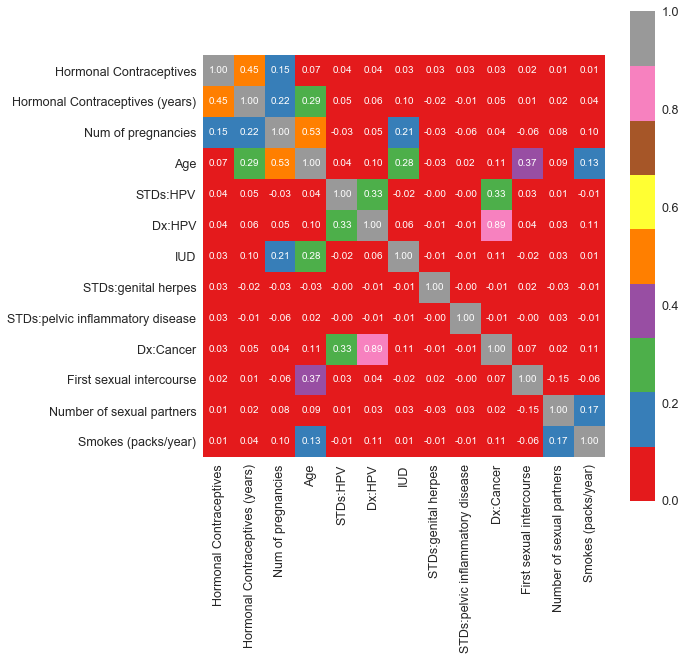

In [252]:
corrmat = df2.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Hormonal Contraceptives')['Hormonal Contraceptives'].index

cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df2[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, cmap='Set1' ,annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

If patient is older than sample mean or number of pregnancies is lower than mean then patient may take Hormonal Contraceptives

In [253]:
l = (df2['Age']>df2['Age'].mean())
df2.loc[l,'Hormonal Contraceptives'] = df2.loc[l,'Hormonal Contraceptives'].fillna(1)

l = (df2['Num of pregnancies']<df2['Num of pregnancies'].mean())
df2.loc[l,'Hormonal Contraceptives'] = df2.loc[l,'Hormonal Contraceptives'].fillna(1)

df2['Hormonal Contraceptives'].fillna(0,inplace = True)
df2['Hormonal Contraceptives'].isnull().sum()

0

### Alternate way? Check the mean age of patients with hormonal contraceptives = 1

For HC(years) NaN values we can fill with median values by using HC feature.

In [254]:
l = (df2['Hormonal Contraceptives'] == 1)
df2.loc[l,'Hormonal Contraceptives (years)'] = df2.loc[l,'Hormonal Contraceptives (years)'].fillna(df2['Hormonal Contraceptives (years)'].median())
l = (df2['Hormonal Contraceptives'] == 0)
df2.loc[l,'Hormonal Contraceptives (years)'] = df2.loc[l,'Hormonal Contraceptives (years)'].fillna(0)

In [255]:
len(df2[(df2['Hormonal Contraceptives'] == 1) & (df2['Hormonal Contraceptives (years)'] == 0) ])

0

In [256]:
len(df2[(df2['Hormonal Contraceptives'] == 0) & (df2['Hormonal Contraceptives (years)'] != 0) ])

0

## IUD
Using pearson correlation we can determine which feature is effect 'IUD'.

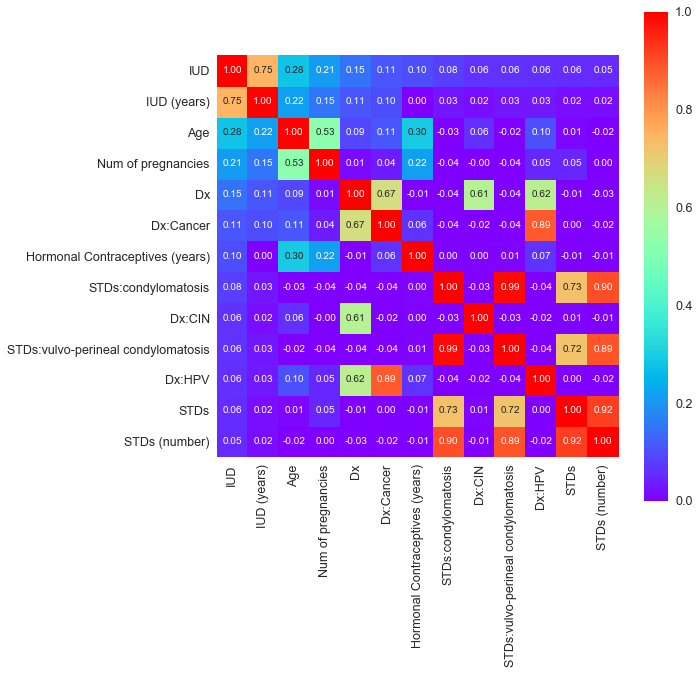

In [257]:
corrmat = df2.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'IUD')['IUD'].index

cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df2[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'rainbow', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [258]:
len(df2[(df2['Age']>df2['Age'].mean())&(df2['IUD']==1)])

66

In [259]:
len(df2[df2['IUD']==1])

83

This show that %80 of patients who take IUD are older than age mean. We can fillna values according to this discovery.

In [260]:
l = (df2['Age']>df2['Age'].mean())
df2.loc[l,'IUD'] = df2.loc[l,'IUD'].fillna(1)

In [261]:
len(df2[(df2['Num of pregnancies']<df2['Num of pregnancies'].mean())&(df2['IUD']==0)])

458

In [262]:
len(df2[df2['IUD']==0])

658

%70 of patients who do not take IUD have lower number of pregnancies than mean of number of pregnancies. We can fill remaining NaN with 0 values.


In [263]:
df2['IUD'].fillna(0, inplace = True)

For IUD (years) feature we can fill NaN values with IUD feature.

In [264]:
l = (df2['IUD'] == 1)
df2.loc[l,'IUD (years)'] = df2.loc[l,'IUD (years)'].fillna(df2['IUD (years)'].median())

l = (df2['IUD'] == 0)
df2.loc[l,'IUD (years)'] = df2.loc[l,'IUD (years)'].fillna(0)

Relationship b/w IUD & IUD (years)

In [265]:
len(df2[(df2['IUD'] == 1) & (df2['IUD (years)'] == 0) ])

38

If patient takes IUD then UID (years) have to be non zero values then we need to change it to mean values.

In [266]:
l = (df2['IUD'] == 1) & (df2['IUD (years)'] == 0)
df2.loc[l,'IUD (years)'] = df2['IUD (years)'].mean()

len(df2[(df2['IUD'] == 1) & (df2['IUD (years)'] == 0) ])



0

In [267]:
len(df2[(df2['IUD'] == 0) & (df2['IUD (years)'] != 0) ])

0

## STDs

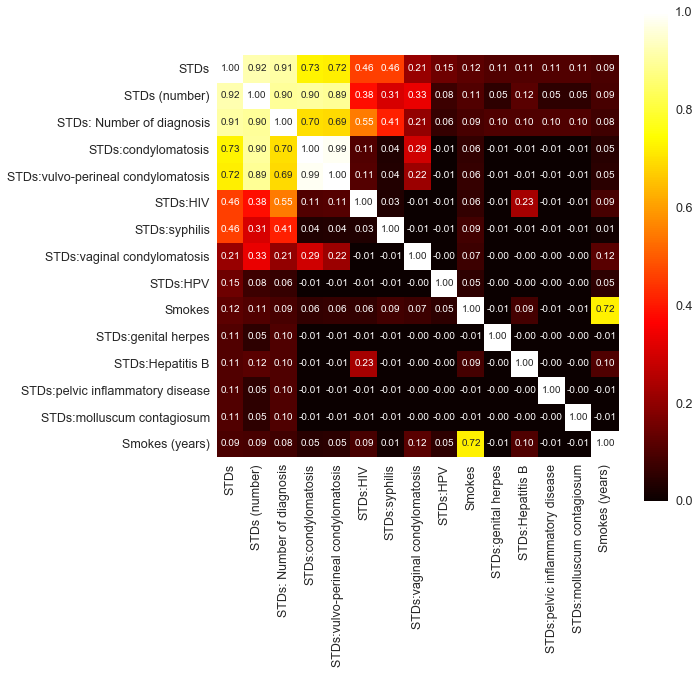

In [268]:
corrmat = df2.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'STDs')['STDs'].index

#cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df2[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'hot', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

According to heatmap we can easily say that 'STDs:condylomatosis' and STDs:vulvo-perineal condylomatosis' features effect 'STDs'. We cannot take 'STD (number)' and 'STDs: Number of diagnosis' because they are same features as 'STDs'. According to our knowledge about STDs we can easily fill Nan values with 1 or zero because if patient have any of STDs diseases then patient STDs feature must be 1 others must be zero.


In [269]:
df3 = df2.copy()

l = (df3['STDs:condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:cervical condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:vaginal condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:vulvo-perineal condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:syphilis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:pelvic inflammatory disease']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:genital herpes']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:molluscum contagiosum']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:AIDS']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:HIV']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:Hepatitis B']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:HPV']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)



It seems that STDs and STD diseases features are paralel. According to that we have to look other features. Smokes and IUD features can be used.


In [270]:
len(df[(df3['STDs'] == 1)])

79

In [271]:
len(df3[(df3['Smokes'] == 0) & (df3['STDs'] == 1)])

58



According to data %73 of patients who are not smoking have STD. But not have Nan values


In [272]:
l = (df3['Smokes']==0)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

In [273]:
len(df3[(df3['IUD'] == 0) & (df3['STDs'] == 1)])

127

In [274]:
len(df3[df3['STDs']==1])

168

%75 of patients who does not take IUD are also have STDs

In [275]:
l = (df3['IUD']==0)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
df3['STDs'].fillna(0, inplace = True)

df3['STDs'].isnull().sum()

0

In [276]:
#Also STDs (number) is same feature as STDs.

df3['STDs (number)'].median()

0.0



This case median is not useful so we can use mean values.


In [277]:
l = (df3['STDs']==1)
df3.loc[l,'STDs (number)'] = df3.loc[l,'STDs (number)'].fillna(df3['STDs (number)'].mean())
df3['STDs (number)'].fillna(0, inplace = True)

df3['STDs (number)'].isnull().sum()



0

## STDs - Diseases

In [278]:
# corrmat = df3.corr()

# plt.figure(figsize=(20,20))

# sns.set(font_scale=2)
# hm = sns.heatmap(corrmat,cmap = 'tab20c', cbar=True, annot=True,vmin=0,vmax =1,
#                  center=True, square=True, fmt='.2f', annot_kws={'size': 10},
#                  yticklabels = df3.columns, xticklabels = df3.columns)
# plt.show()



In [279]:
df4= df3.copy()

l = (df4['STDs']==0)
df4.loc[l,'STDs:condylomatosis'] = df4.loc[l,'STDs:condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:cervical condylomatosis'] = df4.loc[l,'STDs:cervical condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:vaginal condylomatosis'] = df4.loc[l,'STDs:vaginal condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:vulvo-perineal condylomatosis'] = df4.loc[l,'STDs:vulvo-perineal condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:syphilis'] = df4.loc[l,'STDs:syphilis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:pelvic inflammatory disease'] = df4.loc[l,'STDs:pelvic inflammatory disease'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:genital herpes'] = df4.loc[l,'STDs:genital herpes'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:molluscum contagiosum'] = df4.loc[l,'STDs:molluscum contagiosum'].fillna(0)

df4['STDs:molluscum contagiosum'].isnull().sum()

99



For other values we have to fill Nan values with median because all STDs depends on other STDs and also we cannot sure about person disease.


In [280]:
df4['STDs:condylomatosis'].fillna(df4['STDs:condylomatosis'].median(),inplace = True)
df4['STDs:cervical condylomatosis'].fillna(df4['STDs:cervical condylomatosis'].median(),inplace = True)
df4['STDs:vaginal condylomatosis'].fillna(df4['STDs:vaginal condylomatosis'].median(),inplace = True)
df4['STDs:vulvo-perineal condylomatosis'].fillna(df4['STDs:vulvo-perineal condylomatosis'].median(),inplace = True)
df4['STDs:syphilis'].fillna(df4['STDs:syphilis'].median(),inplace = True)
df4['STDs:pelvic inflammatory disease'].fillna(df4['STDs:pelvic inflammatory disease'].median(),inplace = True)
df4['STDs:genital herpes'].fillna(df4['STDs:genital herpes'].median(),inplace = True)
df4['STDs:molluscum contagiosum'].fillna(df4['STDs:molluscum contagiosum'].median(),inplace = True)

df4['STDs:condylomatosis'].isnull().sum()

0

## AIDS
This feature correlation not show us any clue. But we know that AIDS also a STDs disease. Then we can fill NaN values as;


In [281]:
l = (df4['STDs']==0)
df4.loc[l,'STDs:AIDS'] = df4.loc[l,'STDs:AIDS'].fillna(0)
df4['STDs:AIDS'].fillna(df4['STDs:AIDS'].median(),inplace = True)

df4['STDs:AIDS'].isnull().sum()

0

### STDs: HIV

This feature effect by STD feature.

In [282]:
len(df4[df4['STDs:HIV']==1])

18

In [283]:
len(df4[(df4['STDs:HIV']==1) & (df4['STDs']==1)])

18

%100 of patient who have STDs then they have STDs:HIV


In [284]:
l = (df4['STDs']==1)
df4.loc[l,'STDs:HIV'] = df4.loc[l,'STDs:HIV'].fillna(1)
df4['STDs:HIV'].fillna(0,inplace = True)

Cheking contradiction values;

In [285]:
len(df4[(df4['STDs']==0) & (df4['STDs:HIV'] == 1)])

0

In [286]:
df4['STDs:HIV'].isnull().sum()

0

### STDs:Hepatitis B
This feature effect by STDs:HIV feature.

In [287]:
len(df4[df4['STDs:Hepatitis B']==1])

1



There is a one person who have disease. According to population this value is so minimal. We can fill Nan values with 0.


In [288]:
df4['STDs:Hepatitis B'].fillna(0, inplace = True)

df4['STDs:Hepatitis B'].isnull().sum()

0

### STDs:HPV


But HPV's positive values are not enough. Null values cannot define by using important features. We can fill NaN values with 0.


In [289]:
len(df4[df4['STDs:HPV']==1])

2

In [290]:
df4['STDs:HPV'].fillna(0, inplace = True)

df4['STDs:HPV'].isnull().sum()

0

### STDs: Time since first diagnosis and STDs: Time since last diagnosis
If patient STDs is zero then first diagnosis and last diagnosis cannot be a value. We can fill Nan values with this knowledge.

In [291]:
l = (df4['STDs']==1)
df4.loc[l,'STDs: Time since first diagnosis'] = df4.loc[l,'STDs: Time since first diagnosis'].fillna(df4['STDs: Time since first diagnosis'].median())
l = (df4['STDs']==1)
df4.loc[l,'STDs: Time since last diagnosis'] = df4.loc[l,'STDs: Time since last diagnosis'].fillna(df4['STDs: Time since last diagnosis'].median())
df4['STDs: Time since last diagnosis'].fillna(0, inplace = True)
df4['STDs: Time since first diagnosis'].fillna(0, inplace = True)

df4['STDs: Time since last diagnosis'].isnull().sum()

0

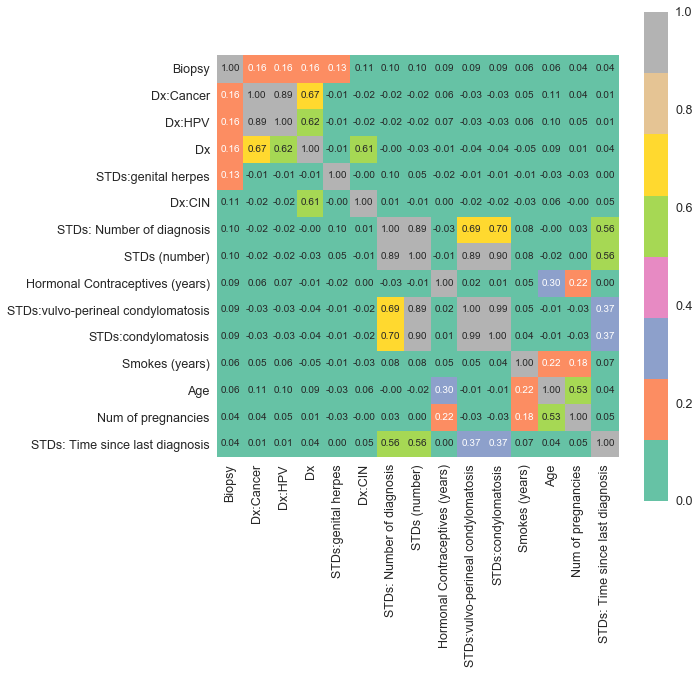

In [292]:


df4['Biopsy'] = df1['Biopsy']

corrmat = df4.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index

#cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df4[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'Set2', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()



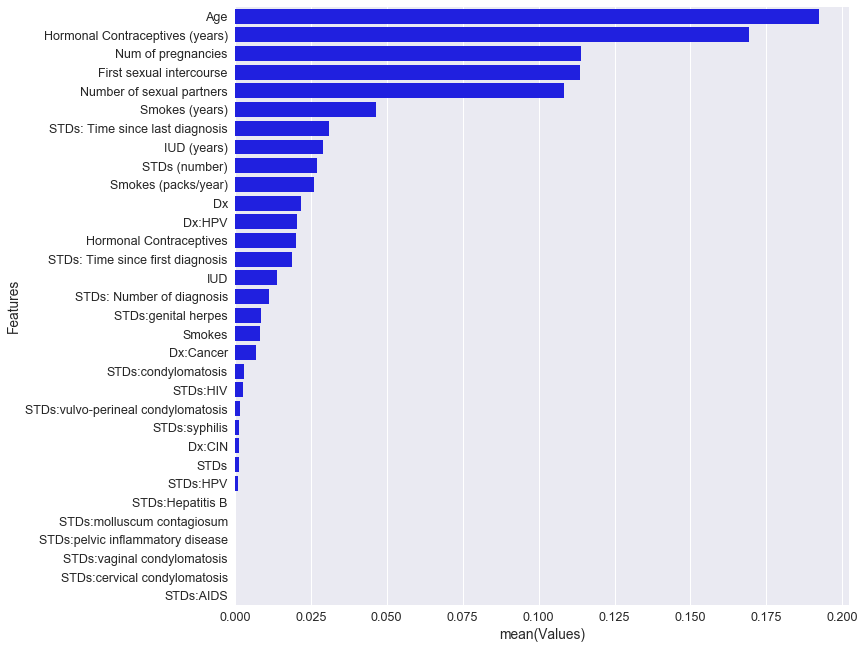

In [293]:


from sklearn.ensemble import RandomForestClassifier

X = df4.drop('Biopsy', axis =1)
Y = df4["Biopsy"]
names = X.columns
rf = RandomForestClassifier()
rf.fit(X, Y)

result_rf = pd.DataFrame()
result_rf['Features'] = X.columns
result_rf ['Values'] = rf.feature_importances_
result_rf.sort_values('Values', inplace = True, ascending = False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Values',y = 'Features', data=result_rf, color="Blue")
plt.show()



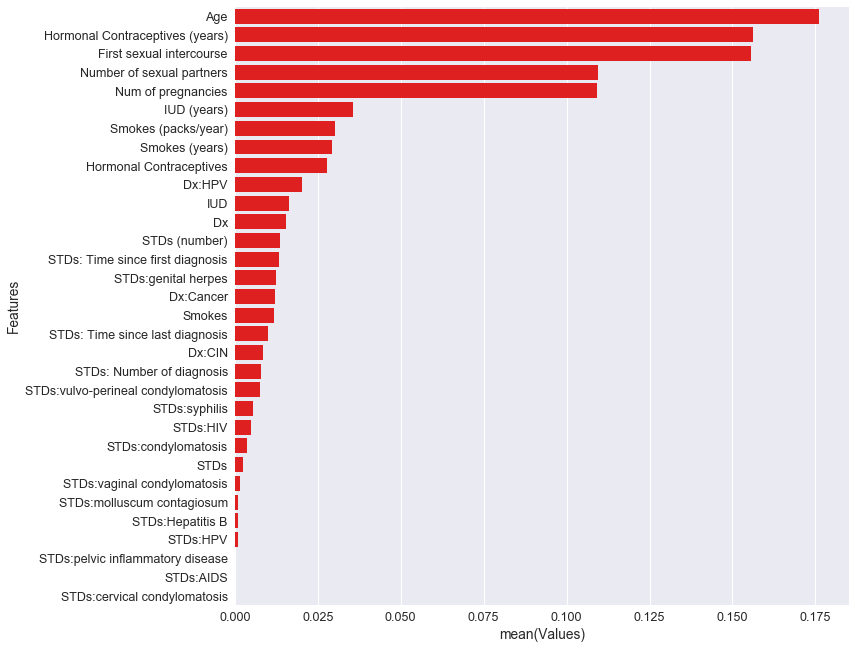

In [294]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)

result_et = pd.DataFrame()
result_et['Features'] = X.columns
result_et ['Values'] = model.feature_importances_
result_et.sort_values('Values', inplace=True, ascending =False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Values',y = 'Features', data=result_et, color="red")
plt.show()

## Feature Extraction

- YAFSI : How many years pass after patient had first sexual intercourse
- SSY : How many years patient did not smoke
- SPYP : After first sexual intercourse how many partners patients had percentage.
- SP: Smoking percentage over age.
- HCP : Hormonal Contraceptices percentage over age
- STDP: STDs percentage over age
- IUDP: IUD percantage over age
- TSP : Total pack of cigarettes of patient smoked
- NPP : Number of pregnancies percantage over age
- NSPP: Number of sexual partners percentage over age
- NDP : Number of STDs diagnosis percentage over age
- TBD : Time betweem diagnosis
- YAHC : How many years patient dont take Hormonal Contraceptives
- YAIUD: How many years patient dont take IUD
- NPSP : Average pregnancy over one sexual partner
- IUDSY: How many years patient take IUD after first sexual intercourse percentage
- HCSY : How many years patient take Hormonal Contraceptives after first sexual intercourse percentage

In [295]:
df5 = df4.copy()

df5['YAFSI'] = df5['Age'] - df5['First sexual intercourse']
df5['SSY'] = df5['Age'] - df5['Smokes (years)']
df5['SPYP'] = df5['Number of sexual partners'] / df5['YAFSI']
df5['SP'] = df5['Smokes (years)'] / df5['Age']
df5['HCP'] = df5['Hormonal Contraceptives (years)'] / df5['Age']
df5['STDP'] = df5['STDs (number)'] / df5['Age']
df5['IUDP'] = df5['IUD (years)'] / df5['Age']
df5['TSP'] = df5['Smokes (packs/year)'] * df5['Smokes (years)']
df5['NPP'] = df5['Num of pregnancies'] / df5['Age']
df5['NSPP'] = df5['Number of sexual partners'] / df5['Age']
df5['NDP'] = df5['STDs: Number of diagnosis'] / df5['Age']
df5['TBD'] = (df5['STDs: Time since first diagnosis'] - df5['STDs: Time since last diagnosis']) / df5['STDs: Number of diagnosis']
df5['YAHC'] = df5['Age'] - df5['Hormonal Contraceptives (years)']
df5['YAIUD'] = df5['Age'] - df5['IUD (years)']
df5['NPSP'] = df5['Num of pregnancies'] / df5['Number of sexual partners']
df5['IUDSY'] = df5['IUD (years)'] / df5['YAFSI']
df5['HCSY'] = df5['Hormonal Contraceptives (years)'] / df5['YAFSI']





After feature creation we probably have infinite and null values because some divisions are (0/0=Null) and (number/0=infinite). We have to check them and fill them with zeros.


In [296]:
df5.replace([np.inf, -np.inf], np.nan, inplace = True)
df5.fillna(0,inplace=True)

### Feature Correlation and Feature Importance After Extraction

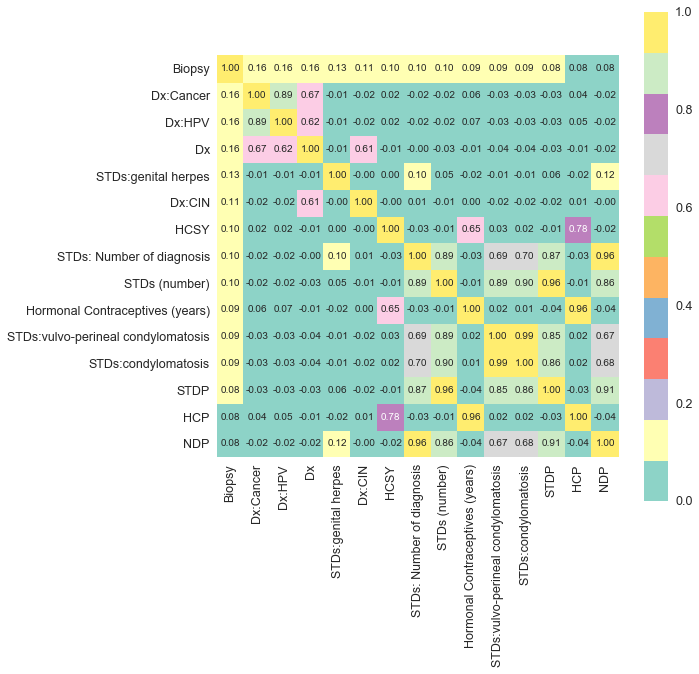

In [297]:
corrmat = df5.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index

#cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df5[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'Set3', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

Our created features are not coralated with biopsy let see their importance over Biopsy feature.

### Random Forest

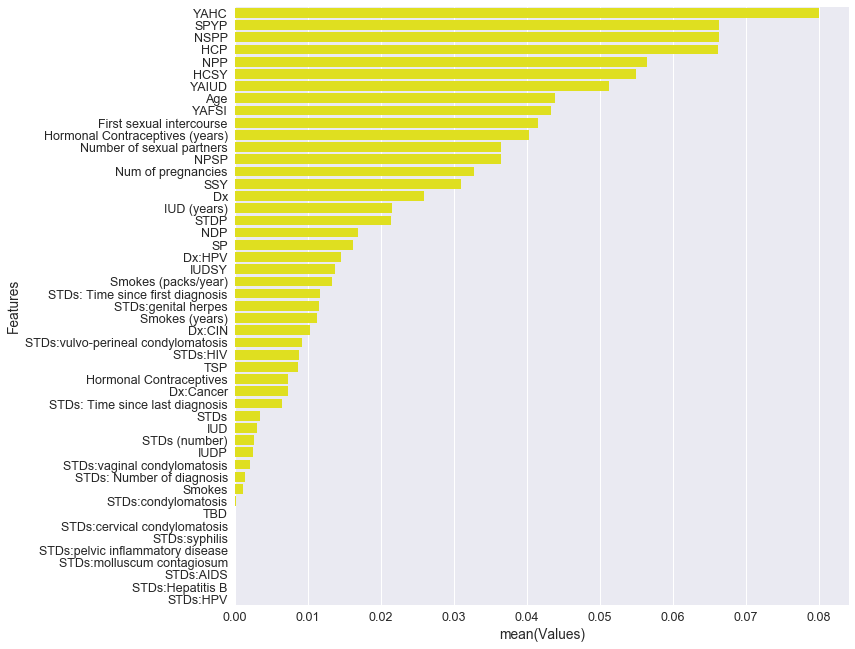

In [298]:
from sklearn.ensemble import RandomForestClassifier

X_p = df5.drop('Biopsy', axis =1)
Y_p = df5["Biopsy"]
names = X_p.columns
rf = RandomForestClassifier()
rf.fit(X_p, Y_p)

result_rf = pd.DataFrame()
result_rf['Features'] = X_p.columns
result_rf ['Values'] = rf.feature_importances_
result_rf.sort_values('Values',inplace=True, ascending = False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Values',y = 'Features', data=result_rf, color="Yellow")
plt.show()

Bunch of new features at the top. Use for modeling?

In [299]:
# df5 = df5.drop(['STDs:Hepatitis B', 'STDs:AIDS', 'STDs:molluscum contagiosum',
#                 'STDs:pelvic inflammatory disease','TBD',
#                'STDs:vaginal condylomatosis','STDs:cervical condylomatosis',
#                'STDs:HPV'],axis=1)

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 50 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null float64
First sexual intercourse              858 non-null float64
Num of pregnancies                    858 non-null float64
Smokes                                858 non-null float64
Smokes (years)                        858 non-null float64
Smokes (packs/year)                   858 non-null float64
Hormonal Contraceptives               858 non-null float64
Hormonal Contraceptives (years)       858 non-null float64
IUD                                   858 non-null float64
IUD (years)                           858 non-null float64
STDs                                  858 non-null float64
STDs (number)                         858 non-null float64
STDs:condylomatosis                   858 non-null float64
STDs:cervical condylomatosis          858 non-null float64
STDs:vaginal

In [300]:
df5['Hinselmann']= df1['Hinselmann']
df5['Schiller']= df1['Schiller']
df5['Citology']= df1['Citology']

In [301]:
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

In [302]:
df_fullna = df5
cancer_df_features = df_fullna.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1)

cancer_df_label = pd.DataFrame(data=df_fullna['Hinselmann'])
cancer_df_label['Schiller'] = df_fullna['Schiller']
cancer_df_label['Citology'] = df_fullna['Citology']
cancer_df_label['Biopsy'] = df_fullna['Biopsy']

def cervical_cancer(cancer_label):
    
    hil, sch, cit, bio = cancer_label
    
    return hil+sch+cit+bio

cancer_df_label['cervical_cancer'] = cancer_df_label[['Hinselmann', 'Schiller', 'Citology','Biopsy']].apply(cervical_cancer,axis=1)

cancer_df_label.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1,inplace=True)
print('Value counts of each target variable:',cancer_df_label['cervical_cancer'].value_counts())
cancer_df_label = cancer_df_label.astype(int)
cancer_df_label = cancer_df_label.values.ravel()

print('Final feature vector shape:',cancer_df_features.shape)
print('Final target vector shape',cancer_df_label.shape)

Value counts of each target variable: 0    756
1     41
3     33
2     22
4      6
Name: cervical_cancer, dtype: int64
Final feature vector shape: (858, 49)
Final target vector shape (858,)


In [303]:
df_fullna['screening'] = np.where((df_fullna['Hinselmann'] == 0) & (df_fullna['Schiller'] == 0) & (df_fullna['Citology'] == 0) & (df_fullna['Biopsy'] == 0), 0 , 1)

In [304]:
df_fullna = df_fullna.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1)

In [305]:
list(df_fullna)[1:len(list(df_fullna))]

['Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'YAFSI',
 'SSY',
 'SPYP',
 'SP',
 'HCP',
 'STDP',
 'IUDP',
 'TSP',
 'NPP',
 'NSPP',
 'NDP',
 'TBD',
 'YAHC',
 'YAIUD',
 'NPSP',
 'IUDSY',
 'HCSY',
 'screening']

In [306]:
df_fullna.screening.value_counts()

0    756
1    102
Name: screening, dtype: int64

In [307]:
# define X and y
feature_cols = list(df_fullna)[1:len(list(df_fullna))-1]

In [308]:
# X is a matrix, hence we use [] to access the features we want in feature_cols
X = df_fullna[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = df_fullna.screening

In [309]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X, y, random_state=0, test_size = 0.4)


In [310]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn import metrics

sm = SMOTE(random_state = 12, ratio = 1)
train_features_res, train_labels_res = SMOTE().fit_sample(train_features, train_labels)
# train_features_res, train_labels_res = ADASYN().fit_sample(train_features, train_labels)



In [176]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#n_estimators=25, random_state=12
clf_rf = RandomForestClassifier()
clf_rf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [177]:
print('Validation Results')
print(clf_rf.score(test_features, test_labels))
print(recall_score(test_labels, clf_rf.predict(test_features)))
print(metrics.f1_score(test_labels,clf_rf.predict(test_features)))
print(metrics.accuracy_score(test_labels,clf_rf.predict(test_features)))

Validation Results
0.866279069767
0.0697674418605
0.115384615385
0.866279069767


In [178]:
test_labels.value_counts()

# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
test_labels.mean()

0.125

In [179]:
# calculate the percentage of zeros
1 - test_labels.mean()

0.875

In [180]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(test_labels.mean(), 1 - test_labels.mean())

0.875

In [181]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(test_labels,clf_rf.predict(test_features))
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[295   6]
 [ 40   3]]


In [182]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
clf_rf.predict(test_features)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

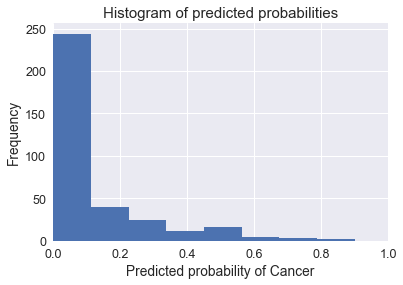

In [183]:
# store the predicted probabilities for class 1
y_pred_prob = clf_rf.predict_proba(test_features)[:, 1]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Cancer')
plt.ylabel('Frequency')

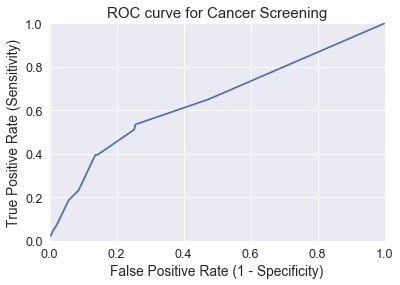

In [184]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(test_labels, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Cancer Screening')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [185]:
print(metrics.roc_auc_score(test_labels,y_pred_prob))

0.644943212547


In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier()
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [110]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_features_res, train_labels_res)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [111]:
rfc1=RandomForestClassifier( max_features='sqrt',
                            n_estimators= 500, max_depth=8, criterion='entropy'
#                             , class_weight = {0:.001, 1: .999} 
#                             random_state=12,
                           )

rfc1.fit(train_features_res, train_labels_res)
pred=rfc1.predict(test_features)

y_pred_prob = rfc1.predict_proba(test_features)[:, 1]

print(metrics.f1_score(test_labels,pred))
print(metrics.roc_auc_score(test_labels,y_pred_prob))

0.203389830508
0.576411960133


In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [81]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 5)
CV_knn.fit(train_features_res, train_labels_res)
CV_knn.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [84]:
knn1 = KNeighborsClassifier(n_neighbors= 1, weights='uniform')

knn1.fit(train_features_res, train_labels_res)
pred=knn1.predict(test_features)

y_pred_prob = knn1.predict_proba(test_features)[:, 1]

print(metrics.f1_score(test_labels,pred))
print(metrics.roc_auc_score(test_labels,y_pred_prob))

0.223880597015
0.548172757475


In [85]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.get_params()


{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [86]:
param_grid = {'random_state': [42],
           'n_estimators': range(1,30)}

CV_ada = GridSearchCV(estimator=ada, param_grid=param_grid, cv= 5)
CV_ada.fit(train_features_res, train_labels_res)
CV_ada.best_params_

{'n_estimators': 29, 'random_state': 42}

In [90]:
ada1 = AdaBoostClassifier(n_estimators=29, random_state=42)

ada1.fit(train_features_res, train_labels_res)
pred=ada1.predict(test_features)

y_pred_prob = ada1.predict_proba(test_features)[:, 1]

print(metrics.f1_score(test_labels,pred))
print(metrics.roc_auc_score(test_labels,y_pred_prob))

0.214285714286
0.503515413737


In [88]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [89]:
param_grid = {'random_state': [42],
              'min_samples_leaf': range(1,30),'min_samples_split': range(2,30)}

CV_DTC = GridSearchCV(estimator=DTC, param_grid=param_grid, cv= 5)
CV_DTC.fit(train_features_res, train_labels_res)
CV_DTC.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 42}

In [95]:
dtc1 = DecisionTreeClassifier(min_samples_leaf= 1, min_samples_split= 3, random_state=42)

dtc1.fit(train_features_res, train_labels_res)
pred=dtc1.predict(test_features)

y_pred_prob = dtc1.predict_proba(test_features)[:, 1]

print(metrics.f1_score(test_labels,pred))
print(metrics.roc_auc_score(test_labels,y_pred_prob))
#, average='weighted'

0.255319148936
0.56157768678
